In [28]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [29]:
import numpy as np
import pandas as pd
import h5py
import itertools
import python_utils_jjm as utils_jjm
from tqdm import tqdm
from scipy import stats
from importlib import reload
from matplotlib import pyplot as plt
import sys
sys.path.append('/Users/johnmarshall/Documents/Analysis/PythonAnalysisScripts/post_cmfe_analysis/')
import miniscope_analysis as ma 
import scipy.spatial.distance as dist
import sklearn.metrics as skm
from tqdm import tqdm

In [30]:
reload(ma)
reload(utils_jjm)

<module 'python_utils_jjm' from '/Users/johnmarshall/Documents/Analysis/PythonAnalysisScripts/post_cmfe_analysis/python_utils_jjm.py'>

In [31]:
dir_ = '/Volumes/My_Passport/cnmfe_analysis_files/OpenFieldAnalysis/'

In [32]:
velocity_aligned = pd.read_hdf(dir_+'all_mice_aligned_to_behavior.h5')

In [38]:
#wt_mice = ['GRIN027', 'GRIN026', 'GRIN013', 'GRIN032']
wt_mice = ['GRIN032']
ko_mice = ['GRIN012', 'GRIN018', 'GRIN011']

In [39]:
velocity_aligned.head()

GRIN011                                                              \
  C_z_scored                                                               
          0         1         2         3         4         5         6    
0  -0.228888 -0.347683 -0.084443  0.315216  0.736817  0.050184 -0.410957   
1  -0.244563 -0.347918 -0.103346  0.271259  0.678833  0.020152 -0.416319   
2  -0.259137 -0.348129 -0.121097  0.229800  0.623781 -0.007913 -0.421413   
3  -0.272688 -0.348320 -0.137766  0.190696  0.571513 -0.034137 -0.426252   
4  -0.177926 -0.348492 -0.153420  0.153814  0.521888 -0.058643 -0.430848   

                                 ...    GRIN032                                \
                                 ... C_z_scored                                 
         7         8         9   ...         34        35        36        37   
0  0.097476  3.419068  0.139459  ...   1.945256 -0.373732  0.217412  0.275235   
1  0.068316  3.185303  0.110913  ...   1.849589 -0.378930  0.194355  0.258418   
2  0.040584  2.965232  0.083968  ...   1.756501 -0.383959  0.172010  0.241963   
3  0.014210  2.758052  0.058535  ...   1.665921 -0.388825  0.150355  0.225862   
4 -0.010873  2.563009  0.034529  ...   1.577783 -0.393533  0.129368  0.210108   

                                                               
                                                               
         38        39        40        41        42        43  
0 -0.412635 -0.347185  0.757467  0.086507  0.105644  0.970088  
1 -0.014215  0.024000  0.666505  0.056907  0.051431  1.198455  
2 -0.033274 -0.018181  0.581682  0.028163 -0.000132  1.898681  
3 -0.051741 -0.057526  0.502582  0.000250 -0.049174  2.435859  
4 -0.069638 -0.094224  0.428819  0.312185 -0.095818  2.654884  

[5 rows x 521 columns]

In [40]:
## velocity correlations by genotype 
wt_cell_z_v_linear_r = []
#mouse = 'GRIN026'
for mouse in wt_mice:
    for cell in velocity_aligned[mouse]['C_z_scored']:
        wt_cell_z_v_linear_r.append(stats.pearsonr(velocity_aligned[mouse]['C_z_scored'][cell], velocity_aligned[mouse]['behavior']['velocity'])[0])
        
ko_cell_z_v_linear_r = []
#mouse = 'GRIN026'
for mouse in ko_mice:
    for cell in velocity_aligned[mouse]['C_z_scored']:
        ko_cell_z_v_linear_r.append(stats.pearsonr(velocity_aligned[mouse]['C_z_scored'][cell], velocity_aligned[mouse]['behavior']['velocity'])[0])


In [44]:
velocity_aligned['GRIN032']['C_z_scored'].head()

0         1         2         3         4         5         6   \
0 -0.195580  4.030452 -0.414852 -0.106266 -0.072519  0.063770 -0.125718   
1 -0.204045  3.908475 -0.421297 -0.112741 -0.076507  0.053911 -0.131867   
2 -0.212376  3.789662 -0.427604 -0.119096 -0.080460  0.044304 -0.137860   
3 -0.220574  3.673932 -0.433777 -0.125334 -0.084377  0.034941 -0.143701   
4 -0.228643  3.561204 -0.439817 -0.131457 -0.088258  0.025817 -0.149394   

         7         8         9   ...        34        35        36        37  \
0 -0.002293  1.532846 -0.310192  ...  1.945256 -0.373732  0.217412  0.275235   
1 -0.011978  1.458686 -0.316815  ...  1.849589 -0.378930  0.194355  0.258418   
2 -0.021514  1.387305 -0.323293  ...  1.756501 -0.383959  0.172010  0.241963   
3 -0.030904  1.318597 -0.329631  ...  1.665921 -0.388825  0.150355  0.225862   
4 -0.040151  1.252464 -0.019950  ...  1.577783 -0.393533  0.129368  0.210108   

         38        39        40        41        42        43  
0 -0.412635 -0.347185  0.757467  0.086507  0.105644  0.970088  
1 -0.014215  0.024000  0.666505  0.056907  0.051431  1.198455  
2 -0.033274 -0.018181  0.581682  0.028163 -0.000132  1.898681  
3 -0.051741 -0.057526  0.502582  0.000250 -0.049174  2.435859  
4 -0.069638 -0.094224  0.428819  0.312185 -0.095818  2.654884  

[5 rows x 44 columns]

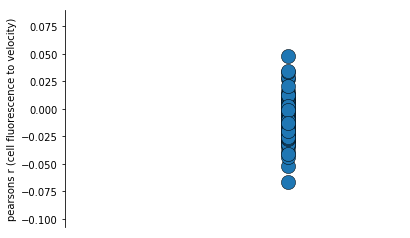

In [41]:
plt.scatter(np.concatenate([np.zeros(len(wt_cell_z_v_linear_r)),np.ones(len(ko_cell_z_v_linear_r))/2]), np.concatenate([wt_cell_z_v_linear_r, ko_cell_z_v_linear_r]),
           s=200, linewidths=.5, edgecolors='k')
plt.xlim([-.5, 1])
ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)
plt.xticks([])
plt.ylabel('pearsons r (cell fluorescence to velocity)')
plt.draw()
plt.savefig('/Users/johnmarshall/Documents/Presentations/Dec2019_report/cell_velocity_correlation.png')
plt.savefig('/Users/johnmarshall/Documents/Presentations/Dec2019_report/cell_velocity_correlation.svg', transparent=True, format="svg")

In [45]:
velocity_aligned[mouse]['C_z_scored'].shape[1]

(25000, 120)

In [99]:
## ISI intervals by genotype 
wt_ISIs = []
ko_ISIs = []
#mouse = 'GRIN026'
#velocity_aligned[mouse]['C_z_scored']:
for mouse in wt_mice:      
    wt_ISIs.append(np.hstack(utils_jjm.get_ISIs(velocity_aligned[mouse]['C_z_scored'], 20, velocity_aligned[mouse]['C_z_scored'].shape[1], 2)[1]))
for mouse in ko_mice:      
    ko_ISIs.append(np.hstack(utils_jjm.get_ISIs(velocity_aligned[mouse]['C_z_scored'], 20, velocity_aligned[mouse]['C_z_scored'].shape[1], 2)[1]))


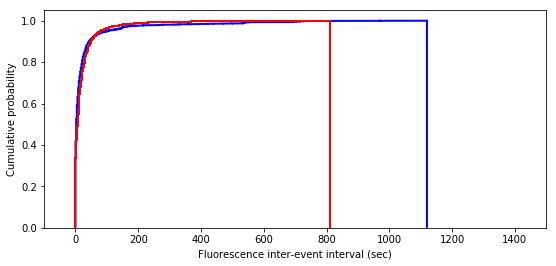

In [100]:
##plotting overall distribution of ISIs
fig, ax = plt.subplots(figsize=(9, 4))
n, bins, patches = ax.hist(np.hstack(wt_ISIs), bins='auto', density=True, histtype='step', cumulative=True, label='Empirical', linewidth=2, color='b')
n, bins, patches = ax.hist(np.hstack(ko_ISIs), bins='auto', density=True, histtype='step', cumulative=True, label='Empirical', linewidth=2, color='r')
plt.ylabel('Cumulative probability')
plt.xlabel('Fluorescence inter-event interval (sec)')
plt.xlim(-100, 1500)
plt.draw()

In [168]:
#for resting periods find all 1 second regions where mouse is moving, then resting periods are seconds where there is no velocity bin 
binned_v_for_resting = utils_jjm.binning_function_uncrop(100, velocity_aligned[mouse]['behavior']['velocity'], 0.05)
#for moving periods find all 100 msecond regions where mouse is moving, then resting periods are seconds where there is no velocity bin 
binned_v_for_moving = utils_jjm.binning_function_uncrop(5, velocity_aligned[mouse]['behavior']['velocity_z_score'], 3)

In [169]:
binned_c_zscore = utils_jjm.binning_function_uncrop(50, velocity_aligned[mouse]['behavior']['velocity'], .1)

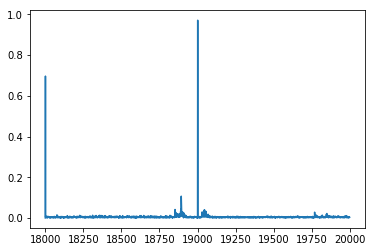

In [170]:
plt.plot(velocity_aligned[mouse]['behavior']['velocity'][18000:20000])

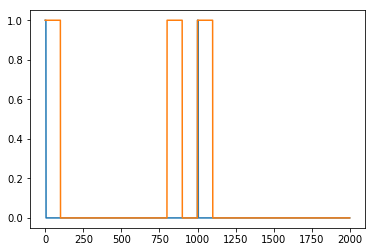

In [171]:
plt.plot(binned_v_for_moving[18000:20000])
plt.plot(binned_v_for_resting[18000:20000])
plt.show()

In [172]:
moving = np.argwhere(binned_v_for_moving == 1 )
not_moving = np.argwhere(binned_v_for_resting == 0)
moving_indicies = np.array([moving[x][0] for x in range(np.shape(moving)[0])])
resting_indicies = np.array([not_moving[x][0] for x in range(np.shape(not_moving)[0])])

In [173]:
velocity_aligned.iloc[moving_indicies,:]['GRIN026']['behavior']['velocity'].head()

150    0.006341
151    0.005396
152    0.005684
153    0.000718
154    0.003429
Name: velocity, dtype: float64

In [174]:
velocity_aligned.iloc[resting_indicies,:]['GRIN026']['behavior']['velocity'].head()

2000    0.000000
2001    0.014966
2002    0.010718
2003    0.008852
2004    0.005900
Name: velocity, dtype: float64

In [183]:
np.max(velocity_aligned.iloc[moving_indicies,:]['GRIN026']['behavior']['velocity'])

0.02925725987289832

In [184]:
np.max(velocity_aligned.iloc[resting_indicies,:]['GRIN026']['behavior']['velocity'])

0.22064730277058348

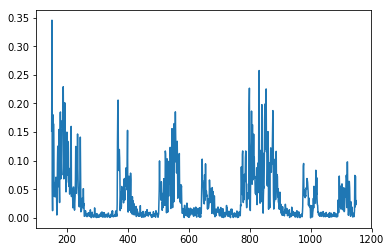

In [185]:
plt.plot(velocity_aligned[mouse]['behavior']['velocity'][150:1150])

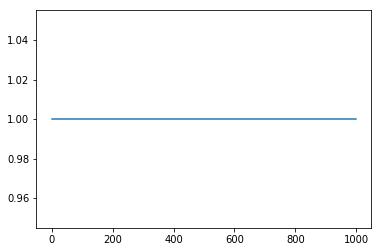

In [186]:
plt.plot(binned_v_for_resting[150:1150])